![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [263]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from datetime import datetime, timedelta 

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv
/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv


In [264]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [265]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# 1. Загрузка данных и общие сведения о датасете

In [266]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [267]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


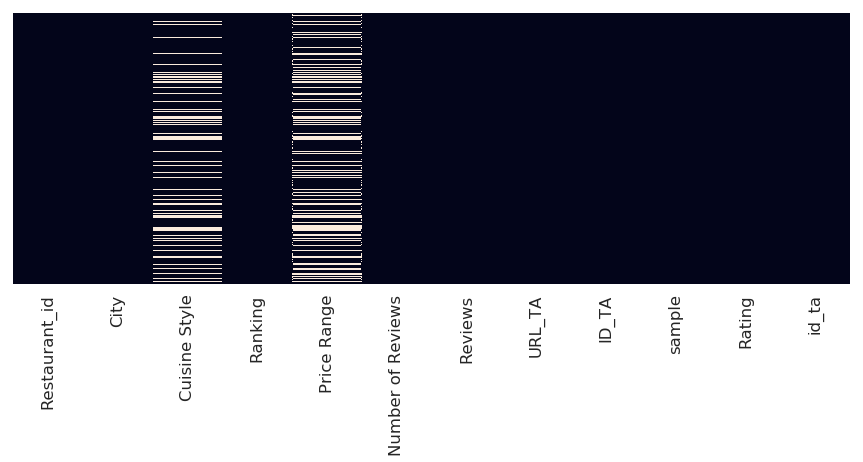

In [268]:
fig, ax = plt.subplots(figsize=(15, 5))
sns_heatmap = sns.heatmap(
    data.isnull(), yticklabels=False, cbar=False)

In [269]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [270]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [271]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [272]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [273]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [274]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [275]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [276]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
24274,id_6766,Madrid,['Spanish'],6769.0,NaN,5.0,"[[], []]",/Restaurant_Review-g187514-d3175317-Reviews-La...,d3175317,1,3.5
45532,id_941,Geneva,NaN,946.0,NaN,2.0,"[['Dinner before the theatre'], ['08/27/2017']]",/Restaurant_Review-g188057-d12252390-Reviews-T...,d12252390,1,4.5
44733,id_1939,Lyon,NaN,1940.0,NaN,11.0,"[[], []]",/Restaurant_Review-g207356-d6894314-Reviews-Le...,d6894314,1,4.0
41787,id_236,Dublin,"['Irish', 'Bar', 'Pub']",237.0,$$ - $$$,459.0,"[['Very interesting place.', 'Good beer select...",/Restaurant_Review-g186605-d696358-Reviews-Ble...,d696358,1,4.0
23809,id_10130,Paris,NaN,10132.0,NaN,8.0,"[[], []]",/Restaurant_Review-g187147-d12716255-Reviews-D...,d12716255,1,3.5


In [277]:
# Столбцы с пропусками
for col in df_train.columns:
    none_val_count = len(df_train) - df_train[col].isna().value_counts()[0]
    if none_val_count !=0:
        print(col, none_val_count)

Cuisine Style 9283
Price Range 13886
Number of Reviews 2543


In [278]:
# Неявные пропуски в столбце 'Reviews', например data['Reviews'][0]
print(data['Reviews'][0])  
print(data['Reviews'][1])

[[], []]
[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]


Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# 2. EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

In [279]:
# Какие признаки можно считать категориальными?
data.nunique(dropna=False)

Restaurant_id        13094
City                    31
Cuisine Style        10732
Ranking              12975
Price Range              4
Number of Reviews     1574
Reviews              41858
URL_TA               49963
ID_TA                49963
sample                   2
Rating                  10
dtype: int64

## 2.1 Вспомогательные функции для EDA

In [280]:
# фиксируем параметры графиков
sns.set(rc={'figure.figsize':(7,5)}, font_scale=0.5, style='whitegrid')

In [281]:
def drow_boxplot(data, column):
    """Функция упрощает отрисовку boxplot для анализируемого столбца и столбца score """
    sns.set(rc={'figure.figsize':(7,5)}, font_scale=1.5, style='whitegrid')
    sns.boxplot(x=data[column])


def drow_hist_joinplot(dt, column, column_bins):
    """Функция отрисовывает гистограмму и jointplot для столбца column
     в интервале (perc25 - 1.5 * IQR, perc75 +  1.5 * IQR) и для столбща столбца 'Rating'"""
   
    median = dt[column].median()
    IQR = dt[column].quantile(0.75) - dt[column].quantile(0.25)
    perc25 = dt[column].quantile(0.25)
    perc75 = dt[column].quantile(0.75)

    if perc75 != perc25:
        dt[column][dt[column].between(perc25 - 1.5 * IQR, perc75 + 1.5 * IQR)].hist(bins=column_bins, label='IQR')
        plt.legend()
        sns.jointplot(x=column, y='Rating', data=dt[dt[column] < perc75 + 1.5 * IQR], kind='reg')
    else:
        dt[column].hist(bins=column_bins, label='All data')
        plt.legend()
        sns.jointplot(x=column, y='Rating', data=dt)

        
def print_data_col_info(data, column_a, column_b):
    """Функция выводит информацию о количестве выбросов, 
    пустых значений, коэфф. корреляции, ..."""

    display(pd.DataFrame(data[column_a].value_counts()))
    median = data[column_a].quantile(0.5)
    IQR = data[column_a].quantile(0.75) - data[column_a].quantile(0.25)
    perc25 = data[column_a].quantile(0.25)
    perc75 = data[column_a].quantile(0.75)      
    print('Информация по столбцу - '+ column_a+ ':')
    if column_a != column_b:
        Kcor = round(
            data[[column_a, column_b]].corr(method='pearson')[column_a][1], 3)
    else:
        Kcor = 1
    nan = int(len(data) -
              data[column_a].describe()[0])  # количество 'nan' значений

    left_border = len(data[data[column_a] < perc25 - 1.5 * IQR])
    right_border = len(data[data[column_a] > perc75 + 1.5 * IQR])

    outliers = left_border + right_border

    print(
        " 25-й перцентиль: {},\n".format(perc25),
        "75-й перцентиль: {},\n".format(perc75),
        "Медиана: {},\n".format(median), "IQR: {},\n".format(IQR),
        "Количество 'nan' значений: {},\n".format(nan),
        "Количество выбросов: {}, слева: {}, справа: {}\n".format(
            outliers, left_border, right_border),
        "Границы выбросов: [{f}, {l}],\n".format(f=perc25 - 1.5 * IQR,
                                                 l=perc75 + 1.5 * IQR),
        "Kоэф. корреляции между \'{}\' и \'{}\' : {},\n".format(
            column_a, column_b, Kcor))


def drow_nomin_hist(data, column, column_beans):
    """Функция отрисовыват гистограмму для номинативных признаков"""
    
    data[column].hist(bins=column_beans)


def print_nomin_info(data, column):   
    """Функция выводит информацию о номинативном признаке """
    
    data[column] = data[column].astype(str).apply(lambda x: None if x.strip() == '' else x)
    display(pd.DataFrame(data[column].value_counts()))
    print("Значений, встретившихся в столбце более 10 раз:",
          (data[column].value_counts() > 10).sum())
    print("Уникальных значений:", data[column].nunique())
    print(data.loc[:, [column]].info())
    data[column].value_counts(ascending=True).plot(kind='bar')

## 2.2 Столбец 'Ranking'

Посмотрим распределение признака

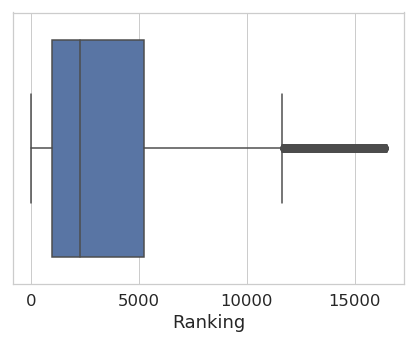

In [282]:
drow_boxplot(data, 'Ranking')

In [283]:
print_data_col_info(data, 'Ranking', 'Rating' )

,Ranking
93.0,22
72.0,21
491.0,21
842.0,21
1013.0,20
...,...
8027.0,1
10415.0,1
14621.0,1
11766.0,1


Информация по столбцу - Ranking:
 25-й перцентиль: 972.0,
 75-й перцентиль: 5241.0,
 Медиана: 2278.0,
 IQR: 4269.0,
 Количество 'nan' значений: 0,
 Количество выбросов: 3075, слева: 0, справа: 3075
 Границы выбросов: [-5431.5, 11644.5],
 Kоэф. корреляции между 'Ranking' и 'Rating' : -0.11,



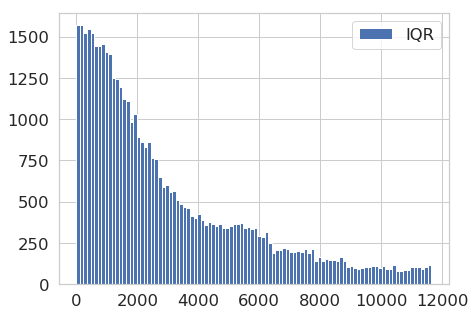

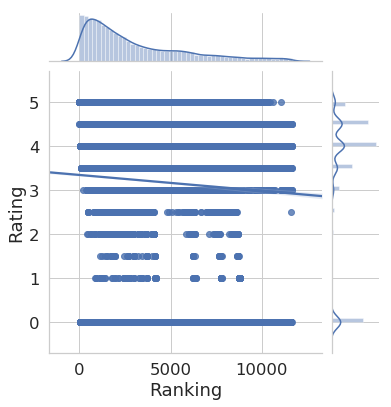

In [284]:
drow_hist_joinplot(data, 'Ranking', 100)

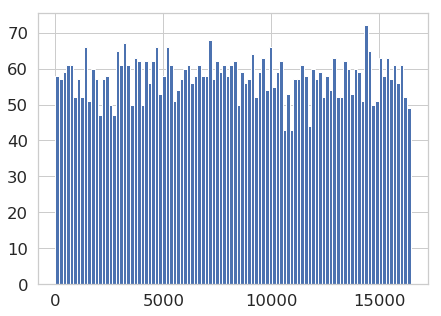

In [285]:
# Распределение ранга в Лондоне
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

## 2.3 Столбец 'City'

,City
London,7193
Paris,6108
Madrid,3813
Barcelona,3395
Berlin,2705
Milan,2694
Rome,2589
Prague,1816
Lisbon,1647
Vienna,1443


Значений, встретившихся в столбце более 10 раз: 31
Уникальных значений: 31
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 1 columns):
City    50000 non-null object
dtypes: object(1)
memory usage: 390.8+ KB
None


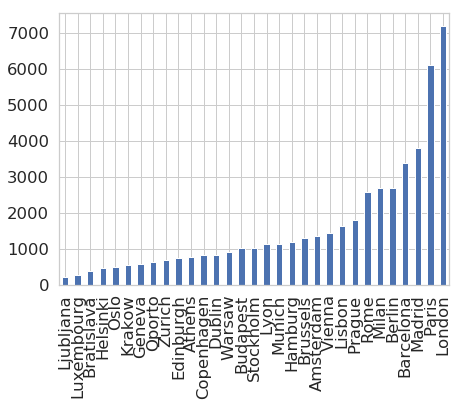

In [286]:
print_nomin_info(data, 'City')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

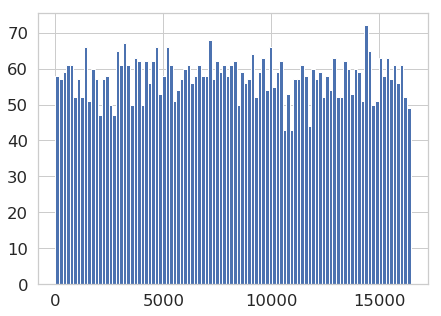

In [287]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

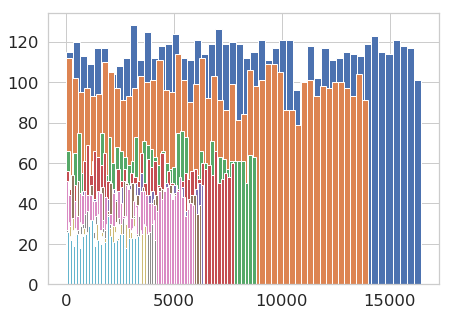

In [288]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=50)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


## 2.4 Столбец 'Number of Reviews'

In [289]:
data['Number of Reviews'].fillna(0.0, inplace = True)
data['Number of Reviews'] = data['Number of Reviews'].apply(lambda x: int(x))

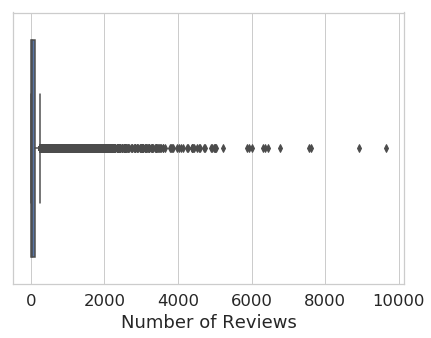

In [290]:
drow_boxplot(data, 'Number of Reviews')

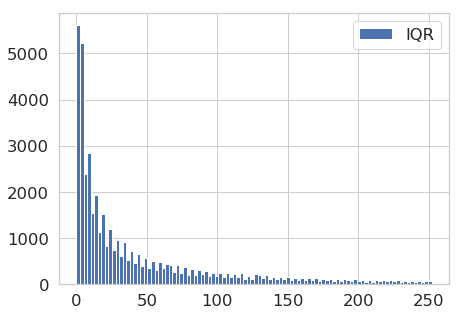

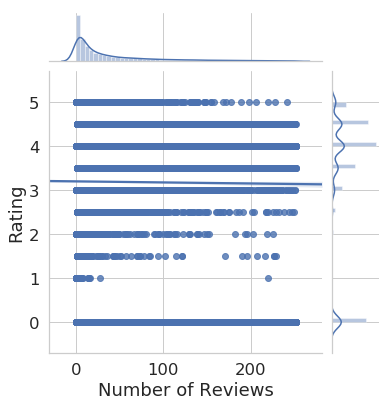

In [291]:
drow_hist_joinplot(data, 'Number of Reviews', 100)

## 2.5 Столбец 'Rating'  - целевая переменная

,Rating
4.0,13692
4.5,10929
0.0,10000
3.5,6824
5.0,3879
3.0,2955
2.5,915
2.0,466
1.0,201
1.5,139


Значений, встретившихся в столбце более 10 раз: 10
Уникальных значений: 10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 1 columns):
Rating    50000 non-null object
dtypes: object(1)
memory usage: 390.8+ KB
None


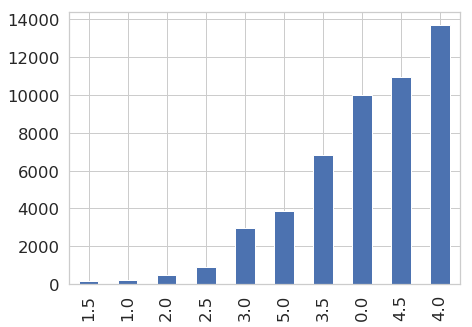

In [292]:
print_nomin_info(data, 'Rating')

### Посмотрим распределение целевой переменной относительно признака

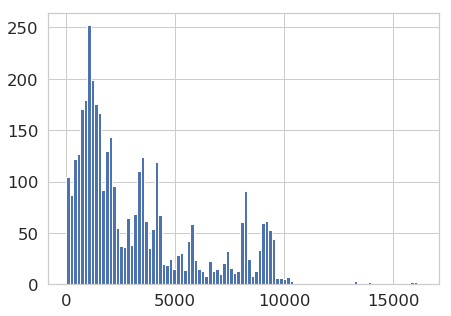

In [293]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

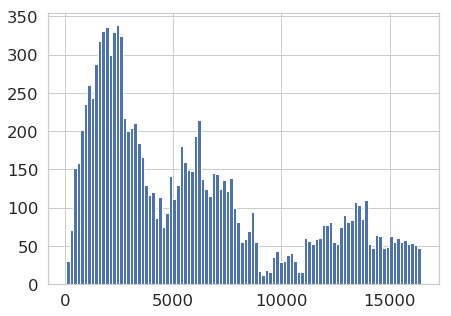

In [294]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

## 2.6 Столбец 'ID_TA'

In [302]:
data['id_ta'] = data['ID_TA'].apply(lambda x: int(x[1:]))

In [303]:
data['id_ta'].isna().value_counts()

False    50000
Name: id_ta, dtype: int64

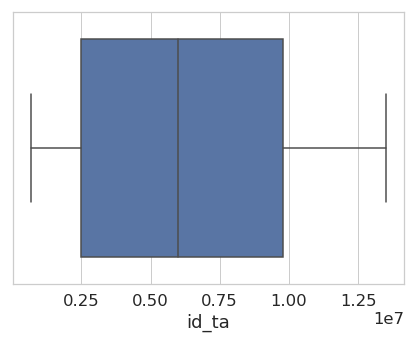

In [304]:
drow_boxplot(data, 'id_ta')

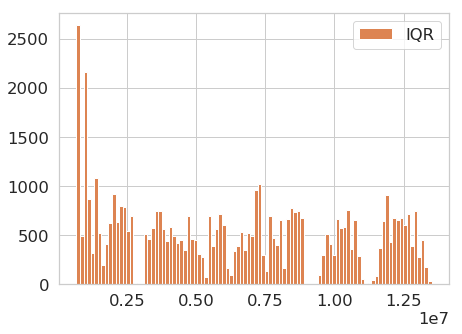

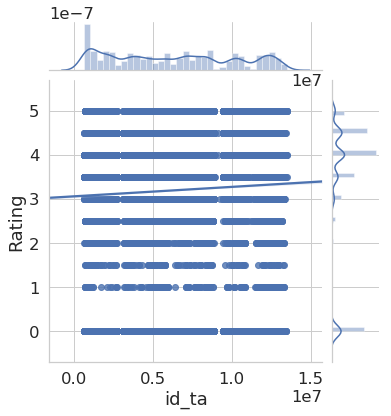

In [306]:
data['id_ta'].hist(bins=100)
drow_hist_joinplot(data, 'id_ta', 100)

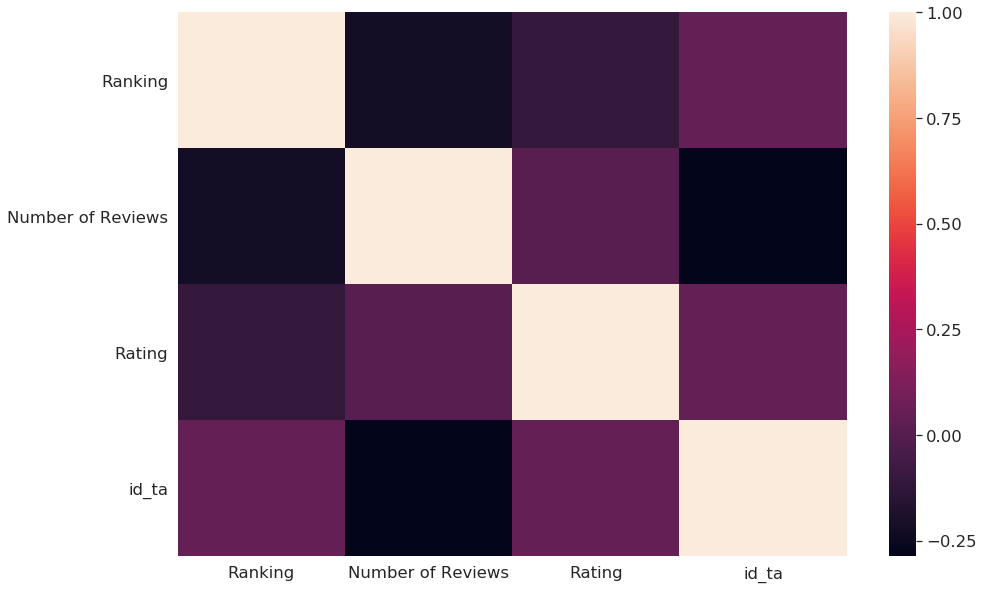

In [307]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

# 3. Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

## 3.1 Загрузка данных

In [308]:
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


## 3.2 Обрабатываем 'Number of Reviews'

In [309]:
# Заполняем пропуски в столбце 'Number of Reviews'
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

# Далее заполняем пропуски 0, вы можете попробовать заполнением средним или средним по городу и тд...
data['Number of Reviews'].fillna(0, inplace=True)

## Добавим полиноминальный признак


In [310]:
data['Number of Reviews_2'] = data['Number of Reviews']**2

## 3.2 Обрабатываем 'Price Range'

In [311]:
data['Price Range'].fillna('$$ - $$$', inplace=True)


print(data['Price Range'].value_counts())

def price_range_one_hot_encod(price_range):
        ''' Замена строковых значений числовыми '''

        if price_range == '$$ - $$$':
            return 1
        if price_range == '$$$$':
            return 2
        if price_range == '$$':
            return 3

        
data['price_range'] = data['Price Range'].apply(price_range_one_hot_encod)


# Заполняем пропуски в столбце 'Number of Reviews'
data['Price Range_isNAN'] = pd.isna(data['Price Range']).astype('uint8')

data = pd.get_dummies(data, columns = ['price_range'], dummy_na=True)  
data = data.drop(columns = ['Price Range'])

$$ - $$$    40402
$            7816
$$$$         1782
Name: Price Range, dtype: int64


## 3.2 Обрабатываем 'City'

Добавляем признак с внешними данными

In [312]:
#  Словать с населением городов
population_dict = {'London' :    8250000, 
                   'Paris' :     2041826, 
                   'Madrid' :    3142880, 
                   'Barcelona' : 1590000, 
                   'Berlin' :    3350000, 
                   'Milan' :     1342000, 
                   'Rome' :      2800000, 
                   'Prague' :    1294000, 
                   'Vienna' :    1840000, 
                   'Amsterdam' : 860000, 
                   'Brussels' :  179000, 
                   'Hamburg' :   1841000, 
                   'Munich' :    1471000, 
                   'Lyon' :      516000, 
                   'Stockholm' : 975000, 
                   'Budapest' :  1762000, 
                   'Warsaw' :    1810000, 
                   'Dublin' :    1173000, 
                   'Copenhagen': 974000, 
                   'Athens' :    665000, 
                   'Edinburgh' : 513000, 
                   'Lisbon' :    506000, 
                   'Zurich' :    434000, 
                   'Oporto' :    237000, 
                   'Geneva' :    201000, 
                   'Krakow' :    779000, 
                   'Oslo' :      693000, 
                   'Helsinki' :  643000, 
                   'Bratislava': 413000, 
                   'Luxembourg': 626000, 
                   'Ljubljana' : 284000,
                   }

data['population'] = data.apply(lambda x: population_dict[x['City']], axis = 1)

Добвляем новый признак  - количество ресторанов в городе

In [313]:
data['rest_counts'] = data['City'].apply(lambda x: data['City'].value_counts()[x])

Добавляем новый признак - плотность ресторанов в городе

In [314]:
data['rest_density'] = data['rest_counts'] / data['population']

## 3.3 Обрабатываем 'Ranking'

In [315]:
city_rest_count = data.groupby(['City'])['Ranking'].max()


data['city_rest_count'] = data['City'].apply(lambda x: city_rest_count[x])
data['city_rest_density'] = data['population']/data['Ranking']
    
    

data['norm_ranking'] = data.groupby('City')['Ranking'].transform(lambda x: (x-x.mean())/x.std())

data['rel_ranking'] = (data['Ranking'] / data['city_rest_count'])

In [316]:
# добавление полиномиального признака
# data['ranking_reviews_count'] = data['Ranking'] * data['Number of Reviews']   # на проверочных данных увеличивае МАЕ, на текущих уменьшает

In [317]:
# top_city_list = list(data['City'].value_counts().index[:8])
# def replace_city(city):
#     '''Функция возвращает значение 'Other city', если входного параметра нет в топ n городов '''
    
#     if city in top_city_list:
#         return city
#     return 'Other city'
# data['City'] = data['City'].apply(replace_city)

In [ ]:
data['reviews_in_city'] = data['City'].apply(lambda x: data.groupby(['City'])['Number of Reviews'].sum().sort_values(ascending=False)[x])
data['relative_rank_reviews'] = data['Ranking'] / data['reviews_in_city']

In [ ]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)

## 3.4 Обрабатываем 'Cuisine Style'

Заполняем пропуски в 'Cuisine Style' наиболее популярным значением.

In [ ]:
data['Cuisine Style'] = data['Cuisine Style'].fillna("['Vegetarian Friendly', 'European']") # Vegetarian Friendly  ниже выявлены самые популярные виды кухонь
data['Cuisine Style'].value_counts()

In [ ]:
# Определяем наиболее популярные виды кухни 
cuisine_styles = []
for cuisine_style in data['Cuisine Style'].value_counts().index:
    cuisine_style_list = cuisine_style[2:-2].split("', '")
    for cuisine_style_item in cuisine_style_list:
        cuisine_styles.append(cuisine_style_item)

        
cuisine_styles = set(cuisine_styles)

cuisine_styles_dict = {}
new_cuisine_styles_dict = {}

for cuisine in cuisine_styles:
    cuisine_styles_dict[cuisine] = 0

for i in range(len(data)):   
    for cuisine_style in data['Cuisine Style'].iloc[i][2:-2].split("', '"):
        cuisine_styles_dict[cuisine_style]+=1
        
for key,value in cuisine_styles_dict.items():
#     if value > 3000:
     new_cuisine_styles_dict[key] = value
     print(key,value)  

Добавим столбец с количнством кухонь 'Cuisine_styles_count'

In [ ]:
# Добавим столбец с количнством кухонь

def get_cuisine_style_count(cuisine_styles):
     '''Функция возвращает количество кухонь в реторане'''
     
     return len(cuisine_styles[1:-1].split("', '"))
    
data['Cuisine_styles_count'] = data['Cuisine Style'].apply(get_cuisine_style_count)       

In [ ]:
# data['ddd'] = data['norm_ranking'] * data['Cuisine_styles_count']   # в данной выборке MAE уменьшает, в проверочной увеличивает

Создаем вummy переменные для 'Cuisine Style'

In [ ]:
# # Dummy переменные для 'Cuisine Style'    # Увеличивает МАЕ
# for  cuisine in cuisine_styles:
#     data[cuisine] = 0
# for i in range(len(data)):
#     for cuisine in cuisine_styles:
#         if cuisine in data.iloc[i]['Cuisine Style']:
#              data.at[i, cuisine] = 1

## 3.4 Обрабатываем 'Reviews'

Cоздаем колонки с датами

In [ ]:
def get_reviews(reviews):
    '''Функция возвращает список с отзывами'''
    return reviews.split("], [")[0]

def get_reviews_dates(reviews):
    '''Функция возвращает списокс датами'''
    return reviews.split("], [")[1]

data['Reviews'].fillna('[[], []] ', inplace = True)
data['reviews'] = data['Reviews'].apply(get_reviews)
data['reviews'] = data['reviews'].replace('', 'Nan')


data['reviews_dates'] = data['Reviews'].apply(get_reviews_dates)


def get_first_date(reviews_dates):
    '''Функция возвращает первую дату из списка'''
    
    date = reviews_dates.split(", ")[0]
    if date == ']]':
        return None
    if "']" in date[1:-1]:
        return    datetime.strptime(date[1:-3], '%m/%d/%Y').timestamp()
    if "]" == date[1:-1]:
        return    None
    return  datetime.strptime(date[1:-1], '%m/%d/%Y').timestamp()

def get_second_date(reviews_dates):
    '''Функция возвращает вторую дату из списка'''
    if len(reviews_dates.split(", ")) == 1:
        return None
    if len(reviews_dates.split(", ")) > 1:
        date = reviews_dates.split(", ")[1]
        if "']" in date[1:-1]:
            return    datetime.strptime(date[1:-3], '%m/%d/%Y').timestamp()
        return datetime.strptime(date[1:-3], '%m/%d/%Y').timestamp()

data['first_date'] = data.reviews_dates.apply(get_first_date)
data['first_date'] = data['first_date'].fillna(data['first_date'][data['first_date'] != 0.0].min())


data['second_date'] = data.reviews_dates.apply(get_second_date)
data['second_date'] = data['second_date'].fillna(data['second_date'][data['second_date'] != 0.0].min() ) 

data['Days'] = (data['second_date'] - data['first_date'])
data['Days'].fillna(data['Days'].mean(), inplace = True)



## 3.6 Обрабатываем 'ID_TA'

In [ ]:
data['id_ta'] = data['ID_TA'].apply(lambda x: int(x[1:]))

In [ ]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

## Удаляем лишние признаки

In [ ]:

# data = data.drop(columns = ['Restaurant_id','Cuisine Style','first_date','second_date', 'Reviews', 'reviews', 'reviews_dates',  'URL_TA', 'ID_TA'], axis = 1)  # увеличивает значение MAE
data = data.drop(columns = ['Restaurant_id','Cuisine Style', 'Reviews', 'reviews', 'reviews_dates', 'URL_TA', 'ID_TA'], axis = 1)  

на всякий случай заполняем пустые значения

In [ ]:
data = data.fillna(0)

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [ ]:
# Теперь выделим тестовую часть
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [ ]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [ ]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

# Model 
Сам ML

In [ ]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [ ]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [ ]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)
y_pred = np.round(y_pred*2)/2

In [ ]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

In [ ]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [ ]:
test_data.sample(10)

In [ ]:
test_data = test_data.drop(['Rating'], axis=1)

In [ ]:
sample_submission

In [ ]:
predict_submission = model.predict(test_data)

In [ ]:
predict_submission

In [ ]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
